In [1]:
import numpy as np
import matplotlib.pyplot as plt

args = (a,b,c,d,I)

In [2]:
def vdot(u, v, *args):
    I = args[4]
    return 0.04*v*v + 5*v + 140 - u + I

In [3]:
def udot(u, v, *args):
    a = args[0]
    b = args[1]
    return a*(b*v - u)

In [4]:
def reset_uv(u, v, *args):
    c = args[2]
    d = args[3]
    if v >= 30:
        v = c
        u += d
        return u, v
    else:
        return u, v

In [5]:
def init_uv(v0, b):
    return [v0*b], [v0]

In [9]:
def current(t):
    if t < 40.:
        return 0.
    else:
        return 10.

In [7]:
def RK4(u, v, *args, h):
    args = np.array(args)
    
    ku1 = h*udot(u, v, *args)
    kv1 = h*vdot(u, v, *args)
    
    ku2 = h*udot(u + 0.5*ku1, v + 0.5*kv1, *args)
    kv2 = h*vdot(u + 0.5*ku1, v + 0.5*kv1, *args)
    
    ku3 = h*udot(u + 0.5*ku2, v + 0.5*kv2, *args)
    kv3 = h*vdot(u + 0.5*ku2, v + 0.5*kv2, *args)
    
    ku4 = h*udot(u + ku3, v + kv3, *args)
    kv4 = h*vdot(u + ku3, v + kv3, *args)
    
    u += (ku1 + 2*ku2 + 2*ku3 + ku4)/6.
    v += (kv1 + 2*kv2 + 2*kv3 + kv4)/6.
    
    u, v = reset_uv(u, v, *args)
    
    return u, v

In [8]:
def params(model):
    if model in ['LTS', 'TC']:
        a = 0.02
        b = 0.025
    elif model in ['RS', 'IB', 'CH']:
        a = 0.02
        b = 0.2
    elif model in ['RZ']:
        a = 0.1
        b = 0.25
    elif model in ['FS']:
        a = 0.1
        b = 0.2

    if model in ['RS']:
        c = -65
        d = 8
    elif model in ['FS', 'LTS', 'RZ']:
        c = -65
        d = 2
    elif model in ['TC']:
        c = -65
        d = 0.05
    elif model in ['IB']:
        c = -55
        d = 4
    elif model in ['CH']:
        c = -50
        d = 2
        
    return a,b,c,d

Text(0.5, 1.0, 'RS: a=0.02 b=0.2 c=-65 d=8')

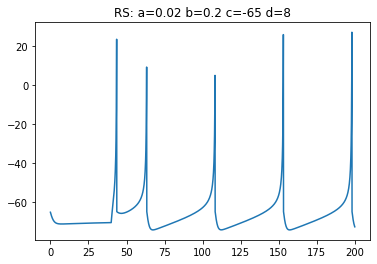

In [11]:
model = 'RS'
a,b,c,d = params(model)

u, v = init_uv(-65, b)
for t in np.arange(0, 200, .1):
    I = current(t)
    tmpu, tmpv = RK4(u[-1], v[-1], a,b,c,d,I, h=.1)
    u.append(tmpu)
    v.append(tmpv)

plt.plot(np.arange(0, 200, .1), v[1:])
plt.title('%s: a=%g b=%g c=%g d=%g'%(model, a,b,c,d))

Text(0.5, 1.0, 'IB: a=0.02 b=0.2 c=-55 d=4')

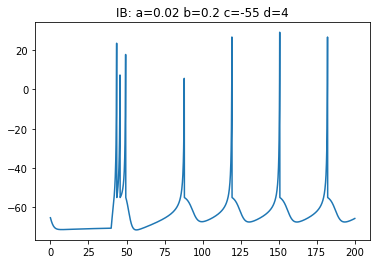

In [12]:
model = 'IB'
a,b,c,d = params(model)

u, v = init_uv(-65, b)
for t in np.arange(0, 200, .1):
    I = current(t)
    tmpu, tmpv = RK4(u[-1], v[-1], a,b,c,d,I, h=.1)
    u.append(tmpu)
    v.append(tmpv)

plt.plot(np.arange(0, 200, .1), v[1:])
plt.title('%s: a=%g b=%g c=%g d=%g'%(model, a,b,c,d))

Text(0.5, 1.0, 'FS: a=0.1 b=0.2 c=-65 d=2')

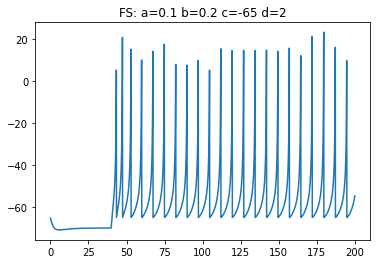

In [13]:
model = 'FS'
a,b,c,d = params(model)

u, v = init_uv(-65, b)
for t in np.arange(0, 200, .1):
    I = current(t)
    tmpu, tmpv = RK4(u[-1], v[-1], a,b,c,d,I, h=.1)
    u.append(tmpu)
    v.append(tmpv)

plt.plot(np.arange(0, 200, .1), v[1:])
plt.title('%s: a=%g b=%g c=%g d=%g'%(model, a,b,c,d))